In [2]:
from tensorflow.keras.datasets import mnist
# 학습용과 검증용 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터 전처리
X_train = X_train.reshape(60000, 784).astype('float32') /255.0
X_test = X_test.reshape(10000, 784).astype('float32') /255.0
print(y_train[:5])


[5 0 4 1 9]


[0.67, 0.66, 0.66, 0.67, 0.65, 0.67, 0.68, 0.67, 0.67, 0.66]
최적의 k: 7
최적의 정확도: 0.68


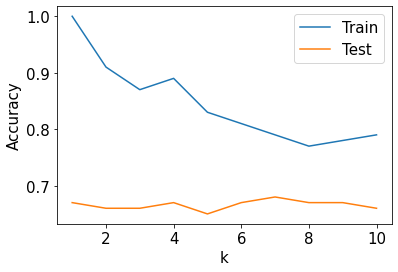

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train[:100], y_train[:100])
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train[:100],
    y_train[:100]))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test[:100], y_test[:100]))
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
print(test_rate)
max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k:', idx+1) 
print('최적의 정확도:', max_rate)

In [4]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [5]:
print(" 학습용:", model.score(X_train[:100], y_train[:100]))
print(" 검증용:", model.score(X_test[:100], y_test[:100]))

 학습용: 0.99
 검증용: 0.99


In [6]:
#모형 저장
import pickle
pickle.dump(model, open('c:/data/mnist/mnist_logit.model', 'wb'))

In [7]:
# 모형 불러오기
model = pickle.load(open('c:/data/mnist/mnist_logit.model', 'rb'))
# 모형 사용
pred = model.predict(X_test[:10])
print(' 예측값:', pred[:10])
print(' 실제값:', y_test[:10])

 예측값: [7 2 1 0 4 1 4 9 5 9]
 실제값: [7 2 1 0 4 1 4 9 5 9]


In [8]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,974,1,1,0,0,1,2,1,0,0
1,0,1133,2,0,0,0,0,0,0,0
2,11,8,988,2,1,0,2,16,4,0
3,0,3,2,976,1,12,1,7,4,4
4,1,8,0,0,945,0,5,1,1,21
5,5,0,0,8,2,866,4,1,2,4
6,6,3,0,0,3,2,944,0,0,0
7,0,25,3,0,1,0,0,989,0,10
8,6,4,6,11,7,12,1,6,916,5
9,5,6,3,6,8,4,1,11,2,963


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [10]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators 트리수
forest=RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [11]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.97915
0.9694
